In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rc('figure', figsize = (12,8))
# Datasets
# https://s3.amazonaws.com/caelum-online-public/856-introducao-python-pandas/02/aluguel.csv.zip
# https://s3.amazonaws.com/caelum-online-public/856-introducao-python-pandas/02/extras.zip

# 2.2 - Importando Dados

In [ ]:
dados = pd.read_csv('../dados/aluguel.csv', sep=';')

tipos_de_dados = pd.DataFrame(dados.dtypes, columns = ['Tipos de Dados'])
tipos_de_dados.columns.name = 'Variáveis'

print(tipos_de_dados)
print('\n')
print('A base de dados apresenta {} registros e {} variáveis.' .format(dados.shape[0], dados.shape[1]))

Variáveis  Tipos de Dados
Tipo               object
Bairro             object
Quartos             int64
Vagas               int64
Suites              int64
Area                int64
Valor             float64
Condominio        float64
IPTU              float64


A base de dados apresenta 32960 registros e 9 variáveis.


In [ ]:
# Extra

df_json = pd.read_json('../dados/aluguel.json')
df_txt = pd.read_table('../dados/aluguel.txt')
df_xlsx = pd.read_excel('../dados/aluguel.xlsx')

df_html_1 = pd.read_html('../dados/dados_html_1.html')
df_html_2 = pd.read_html('../dados/dados_html_2.html')

print(df_html_1)
print('\n')
print(df_html_2[0]) # len = 3

[  FAIXA ETÁRIA UNAFISCO SAÚDE SOFT II SOFT PARTICIPATIVO      UNIQUE
0      00 A 18               R$218,99           R$192,60    R$334,48
1      19 A 23               R$263,63           R$207,67    R$380,06
2      24 A 28               R$322,44           R$224,26    R$464,39
3      29 A 33               R$402,05           R$258,63    R$566,68
4      34 A 38               R$455,17           R$306,37    R$664,61
5      39 A 43               R$489,29           R$417,93    R$742,72
6      44 A 48               R$582,65           R$495,24    R$869,47
7      49 A 53               R$718,86           R$562,64  R$1.046,29
8      54 A 58               R$908,54           R$721,00  R$1.355,74
9   59 OU MAIS             R$1.244,50         R$1.151,62  R$2.003,53]


                  Date  ...                                       Reserve balances maintained 4
                  Date  ... Balances maintained that exceed the top of the penalty- free band 6
0              Month 7  ...                  

# 2.3 - Series e Index

In [ ]:
tipo_de_imovel = pd.DataFrame(dados['Tipo'])
tipo_de_imovel.drop_duplicates(inplace=True)

tipo_de_imovel.index = range(0, len(tipo_de_imovel))
tipo_de_imovel.columns.name = 'id'

print(tipo_de_imovel)

id                         Tipo
0                     Quitinete
1                          Casa
2       Conjunto Comercial/Sala
3                   Apartamento
4            Casa de Condomínio
5                Prédio Inteiro
6                          Flat
7                    Loja/Salão
8       Galpão/Depósito/Armazém
9                Casa Comercial
10                 Casa de Vila
11               Terreno Padrão
12                  Box/Garagem
13                         Loft
14  Loja Shopping/ Ct Comercial
15                      Chácara
16        Loteamento/Condomínio
17                        Sítio
18                Pousada/Chalé
19                       Studio
20                        Hotel
21                    Indústria


In [ ]:
# Extra

data1 = [1, 2, 3, 4, 5]
index = ['Linha' + str(i) for i in range(len(data1))]
s1 = pd.Series(data=data1, index=index)

data2 = {'Linha'+str(i): i for i in range(5)}
s2 = pd.Series(data2)

op = s1 + s2


data3 = [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]
index = ['Linha'+str(i) for i in range(len(data3))]
columns = ['Coluna'+str(i) for i in range(len(data3))]
df3 = pd.DataFrame(data3, index=index, columns=columns)

data4 = {'Coluna0': {'Linha0': 1, 'Linha1': 4, 'Linha2': 7},
         'Coluna1': {'Linha0': 2, 'Linha1': 5, 'Linha2': 8},
         'Coluna2': {'Linha0': 3, 'Linha1': 6, 'Linha2': 9}}
df4 = pd.DataFrame(data4)

data5 = [(1, 2, 3), 
         (4, 5, 6),
         (7, 8, 9)]
df5 = pd.DataFrame(data5, index=index, columns=columns)

df3[df3 > 0] = 'A'
df4[df4 > 0] = 'B'
df5[df5 > 0] = 'C'

df6 = pd.concat([df3, df4, df5])
print(df6)
df7 = pd.concat([df3, df4, df5], axis=1)
print(df7)

       Coluna0 Coluna1 Coluna2
Linha0       A       A       A
Linha1       A       A       A
Linha2       A       A       A
Linha0       B       B       B
Linha1       B       B       B
Linha2       B       B       B
Linha0       C       C       C
Linha1       C       C       C
Linha2       C       C       C
       Coluna0 Coluna1 Coluna2 Coluna0 Coluna1 Coluna2 Coluna0 Coluna1 Coluna2
Linha0       A       A       A       B       B       B       C       C       C
Linha1       A       A       A       B       B       B       C       C       C
Linha2       A       A       A       B       B       B       C       C       C


# 2.4 - Filtrando Dados

In [ ]:
residencial = ['Quitinete', 
'Casa',
'Apartamento',
'Casa de Condomínio',
'Casa de Vila']

selecao = dados['Tipo'].isin(residencial)
dados_residencial = dados[selecao]
dados_residencial.index = range(0, dados_residencial.shape[0])

dados_residencial.to_csv('../dados/aluguel_residencial.csv', sep=';', index=False)

data8 = [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]
df8 = pd.DataFrame(data8, list('321'), list('ZYX'))

df8.sort_index(inplace=True)
df8.sort_index(inplace=True, axis=1)
df8.sort_values(by='X', inplace=True)
df8.sort_values(by=['X', 'Y'], inplace=True)
df8.sort_values(by='3', axis=1, inplace=True)

print(df8)

   Z  Y  X
3  1  2  3
2  4  5  6
1  7  8  9


# 2.5 - Frequência de Imóveis

In [ ]:
dados_res = pd.read_csv('../dados/aluguel_residencial.csv', sep=';')

sel1 = dados_res['Tipo'] == 'Apartamento'
f1 = dados_res[sel1].shape[0]

sel2 = (dados_res['Tipo'] == 'Casa') | (dados_res['Tipo'] == 'Casa de Condomínio') | (dados_res['Tipo'] == 'Casa de Vila')
f2 = dados_res[sel2].shape[0]

sel3 = (dados_res['Area'] >= 60) & (dados_res['Area'] <= 100)
f3 = dados_res[sel3].shape[0]

sel4 = (dados_res['Quartos'] >= 4) & (dados_res['Valor'] < 2000)
f4 = dados_res[sel4].shape[0]

print('''Qtd de imóveis classificados com tipo 'Apartamento' --> {}
Qtd de imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila' --> {}
Qtd de imóveis com área entre 60 e 100 metros quadrados, incluindo os limites --> {}
Qtd de imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00 --> {} ''' 
.format(f1, f2, f3, f4))

Qtd de imóveis classificados com tipo 'Apartamento' --> 19532
Qtd de imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila' --> 2212
Qtd de imóveis com área entre 60 e 100 metros quadrados, incluindo os limites --> 8719
Qtd de imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00 --> 41 


In [ ]:
# Extra

data9 = [(1, 2, 3, 4),
        (5, 6, 7, 8),
        (8, 10, 11, 12),
        (13, 14, 15, 16)]
df9 = pd.DataFrame(data9, 'l1 l2 l3 l4'.split(), 'c1 c2 c3 c4'.split())

print(
    df9['c1'], '\n'*2,
    df9[['c3', 'c1']], '\n'*2,
    df9[:], '\n'*2,
    df9[1:3], '\n'*2,
    df9[1:][['c3', 'c1']], '\n'*2,
    df9.loc['l3'], '\n'*2,
    df9.loc[['l3', 'l2']], '\n'*2,
    df9.loc['l1', 'c2'], '\n'*2,
    df9.iloc[0, 1], '\n'*2,
    df9.loc[['l3', 'l1'], ['c4', 'c1']], '\n'*2,
    df9.iloc[[2, 0], [3, 0]]
)

l1     1
l2     5
l3     8
l4    13
Name: c1, dtype: int64 

     c3  c1
l1   3   1
l2   7   5
l3  11   8
l4  15  13 

     c1  c2  c3  c4
l1   1   2   3   4
l2   5   6   7   8
l3   8  10  11  12
l4  13  14  15  16 

     c1  c2  c3  c4
l2   5   6   7   8
l3   8  10  11  12 

     c3  c1
l2   7   5
l3  11   8
l4  15  13 

 c1     8
c2    10
c3    11
c4    12
Name: l3, dtype: int64 

     c1  c2  c3  c4
l3   8  10  11  12
l2   5   6   7   8 

 2 

 2 

     c4  c1
l3  12   8
l1   4   1 

     c4  c1
l3  12   8
l1   4   1


# 2.6 - Tratando de Dados Faltantes

In [ ]:
# Remover imóveis sem aluguel (Valor)
# Remover apartamentos com condomínio nulo
# Trocar cond nulo pra 0 e iptu nulo pra 0

dados_residencial = pd.read_csv('../dados/aluguel_residencial.csv', sep = ';')
print(dados_residencial.shape[0])
dados_residencial.dropna(subset=['Valor'], inplace=True)

print(dados_residencial.shape[0])
sel5 = (dados_residencial['Tipo'] == 'Apartamento') & (dados_residencial['Condominio'].isnull())
dados_residencial = dados_residencial[~sel5]

print(dados_residencial.shape[0])
dados_residencial.fillna(value={'Condominio': 0, 'IPTU': 0}, inplace=True)

print('\n')
print(dados_residencial.info())

dados_residencial.to_csv('../dados/aluguel_residencial_notnull.csv', sep = ';', index=False)

22580
22571
21826


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21826 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        21826 non-null  object 
 1   Bairro      21826 non-null  object 
 2   Quartos     21826 non-null  int64  
 3   Vagas       21826 non-null  int64  
 4   Suites      21826 non-null  int64  
 5   Area        21826 non-null  int64  
 6   Valor       21826 non-null  float64
 7   Condominio  21826 non-null  float64
 8   IPTU        21826 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB
None


In [ ]:
# Extra

data10 = [0.5, None, None, 0.52, 0.54, None, None, 0.59, 0.6, None, 0.7]
s10 = pd.Series(data10)
s11 = s10

print(s10.fillna(0),
      s10.fillna(method='ffill'), '\n',
      s10.fillna(method='bfill'), '\n',
      s10.fillna(s10.mean()), '\n',
      s10.fillna(method='ffill', limit=1), '\n',
      s11.fillna(method='ffill', limit=1), '\n',
      s11.fillna(method='ffill', limit=10), '\n',
)

0     0.50
1     0.00
2     0.00
3     0.52
4     0.54
5     0.00
6     0.00
7     0.59
8     0.60
9     0.00
10    0.70
dtype: float64 0     0.50
1     0.50
2     0.50
3     0.52
4     0.54
5     0.54
6     0.54
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64 
 0     0.50
1     0.52
2     0.52
3     0.52
4     0.54
5     0.59
6     0.59
7     0.59
8     0.60
9     0.70
10    0.70
dtype: float64 
 0     0.500
1     0.575
2     0.575
3     0.520
4     0.540
5     0.575
6     0.575
7     0.590
8     0.600
9     0.575
10    0.700
dtype: float64 
 0     0.50
1     0.50
2      NaN
3     0.52
4     0.54
5     0.54
6      NaN
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64 
 0     0.50
1     0.50
2      NaN
3     0.52
4     0.54
5     0.54
6      NaN
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64 
 0     0.50
1     0.50
2     0.50
3     0.52
4     0.54
5     0.54
6     0.54
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64 



# 2.7 - Novas Variáveis

In [ ]:
dados = pd.read_csv('../dados/aluguel_residencial_notnull.csv', sep = ';')

dados['Valor Bruto'] = dados['Valor'] + dados['Condominio'] + dados['IPTU']
dados['Valor m2'] = (dados['Valor']/dados['Area']).round(2)
dados['Valor Bruto m2'] = (dados['Valor Bruto']/dados['Area']).round(2)

casa = ['Casa', 'Casa de Condominio', 'Casa de Vila']

dados['Tipo Agregado'] = dados['Tipo'].apply(lambda x: 'Casa' if x in casa else 'Apartamento')

dados_aux = pd.DataFrame(dados[['Tipo Agregado', 'Valor m2', 'Valor Bruto', 'Valor Bruto m2']])
del dados_aux['Valor Bruto']
dados_aux.pop('Valor m2')
dados.drop(['Valor Bruto', 'Valor m2'], axis=1, inplace=True)

dados.to_csv('../dados/aluguel_residencial_notnull.csv', sep = ';', index=False)

print(dados_aux.head(), '\n')
print(dados.head())

  Tipo Agregado  Valor Bruto m2
0   Apartamento           56.50
1          Casa           70.00
2   Apartamento           80.67
3   Apartamento           21.46
4   Apartamento           32.36 

          Tipo           Bairro  Quartos  ...  IPTU  Valor Bruto m2  Tipo Agregado
0    Quitinete       Copacabana        1  ...  60.0           56.50    Apartamento
1         Casa  Jardim Botânico        2  ...   0.0           70.00           Casa
2  Apartamento           Centro        1  ...  20.0           80.67    Apartamento
3  Apartamento     Higienópolis        1  ...   0.0           21.46    Apartamento
4  Apartamento         Cachambi        2  ...  17.0           32.36    Apartamento

[5 rows x 11 columns]


In [ ]:
# Extra

s12 = pd.Series(list('asdadeadesdasesda'))
print(s12.value_counts())

dados = pd.read_csv('../dados/aluguel_residencial_notnull.csv', sep = ';')
print('\n', dados.Tipo.value_counts())

a    5
d    5
s    4
e    3
dtype: int64

 Apartamento           18780
Casa de Condomínio      996
Casa                    965
Quitinete               836
Casa de Vila            249
Name: Tipo, dtype: int64


# 2.8 - Estatísticas Descritivas

                   Valor  Condominio
Bairro                              
Barra da Tijuca  7069.55     3591.01
Botafogo         8791.83      976.28
Copacabana       4126.68     1148.68
Flamengo         4113.53     1102.15
Ipanema          9352.00     2244.44
Leblon           8746.34     2107.18
Tijuca           2043.52      711.69
                 Minimo     Maximo        Soma
Bairro                                        
Barra da Tijuca   800.0   600000.0  27309683.0
Botafogo          700.0  4500000.0   7675266.0
Copacabana        100.0    35000.0  10910934.0
Flamengo          800.0    35000.0   2937058.0
Ipanema          1200.0    90000.0  16496930.0
Leblon            100.0   100000.0  11002902.0
Tijuca            750.0    45000.0   2247872.0


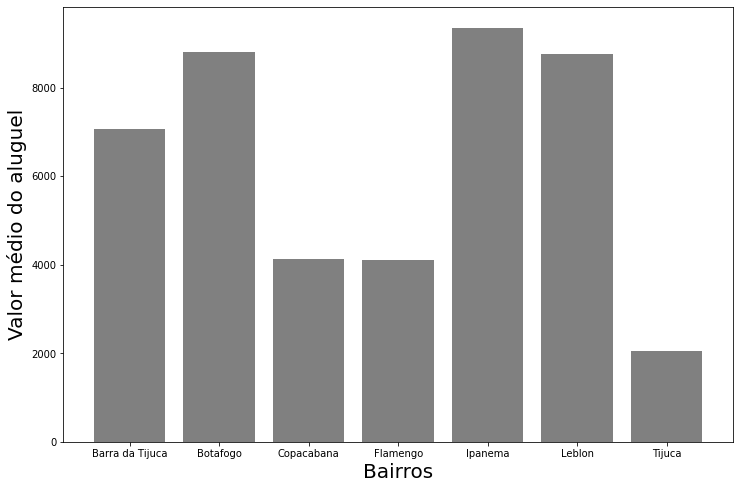

In [ ]:
dados = pd.read_csv('../dados/aluguel_residencial_notnull.csv', sep = ';')

bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

grupo_bairro = dados.groupby('Bairro')
print(grupo_bairro[['Valor', 'Condominio']].mean().round(2))

grupo_bairro['Valor'].describe().round(2)
print(grupo_bairro['Valor'].agg(['min', 'max', 'sum']).rename(columns = {'min': 'Minimo', 'max': 'Maximo', 'sum': 'Soma'}))

data = grupo_bairro.mean()[['Valor', 'Condominio']]
plt.figure()
plt.bar(data.index, height=data['Valor'], color='grey')
plt.xlabel('Bairros', fontsize=20)
plt.ylabel('Valor médio do aluguel', fontsize=20)
pass

In [ ]:
# Extra

dados = pd.read_csv('../dados/aluguel_residencial_notnull.csv', sep = ';')
classes = [0, 2, 4, 6, np.inf]

labels = ['0 a 2 quartos', '3 ou 4 quartos', '4 ou 5 quartos', '6 ou mais']
quartos = pd.cut(dados['Quartos'], labels=labels, bins=classes, include_lowest=True)
print(pd.value_counts(quartos))

0 a 2 quartos     11409
3 ou 4 quartos     9681
4 ou 5 quartos      686
6 ou mais            50
Name: Quartos, dtype: int64


# 2.9 - Removendo Outliers

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


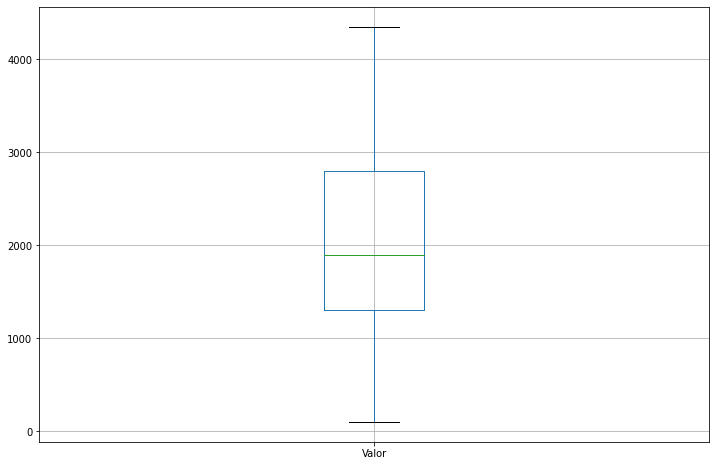

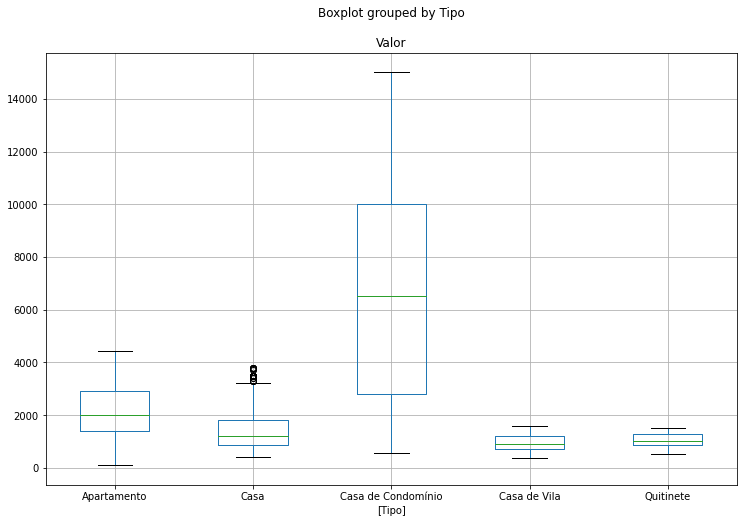

In [ ]:
def clean_outliers(df, series='Valor'):
  val_series = df['Valor']
  Q1 = val_series.quantile(0.25)
  Q3 = val_series.quantile(0.50)
  IIQ = Q3 - Q1
  lim_sup = Q3 + 1.5*IIQ
  lim_inf = Q1 - 1.5*IIQ

  selecao = (val_series >= lim_inf) & (val_series <= lim_sup)
  df = df[selecao]
  return df

dados = pd.read_csv('../dados/aluguel_residencial_notnull.csv', sep = ';')
dados_limpo = clean_outliers(dados, series='Valor')
dados_limpo.boxplot(['Valor'])

grupo_tipo = dados.groupby(by='Tipo')
dados_new = pd.DataFrame()
for tipo, df in grupo_tipo.__iter__():
  df = clean_outliers(df, series='Valor')
  dados_new = pd.concat([dados_new, df])

dados_new.boxplot(['Valor'], by=['Tipo'])
dados_new.to_csv('../dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)

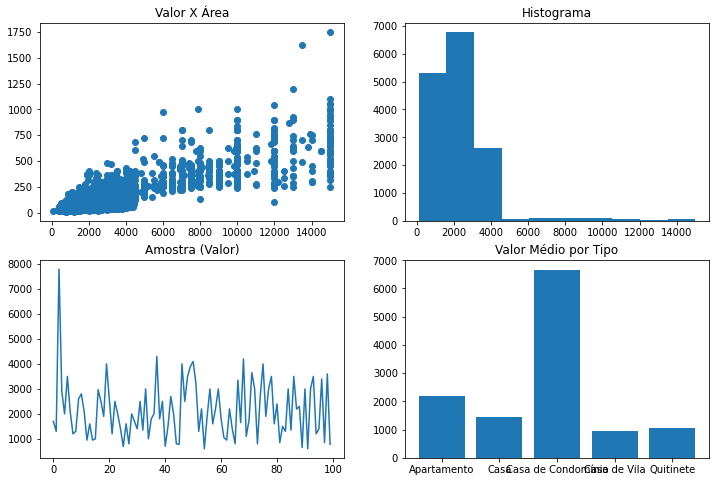

In [ ]:
# Extra

dados = pd.read_csv('../dados/aluguel_residencial_sem_outliers.csv', sep = ';')

area = plt.figure()

g1 = area.add_subplot(2, 2, 1)
g1.scatter(dados.Valor, dados.Area)
g1.set_title('Valor X Área')

g2 = area.add_subplot(2, 2, 2)
g2.hist(dados.Valor)
g2.set_title('Histograma')

g3 = area.add_subplot(2, 2, 3)
dados_g3 = dados.Valor.sample(100)
dados_g3.index = range(dados_g3.shape[0])
g3.plot(dados_g3)
g3.set_title('Amostra (Valor)')

g4 = plt.subplot(2, 2, 4)
grupo = dados.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Valor Médio por Tipo')

area.savefig('../dados/grafico.png', dpi = 300, bbox_inches = 'tight')